## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [2]:
!pip install -qU scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso, Ridge

from sklearn.linear_model import LassoCV

In [21]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [ ]:
print(data.isnull().sum())
data = data.dropna()
print(data.isnull().sum())

In [ ]:
data.Sex.unique()

In [ ]:
data = data.drop(data[data["Sex"] == '.'].index)

In [83]:
data.Sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

**Удалил строку с данными, где пол у пингвина - '.'**

In [84]:
data = pd.get_dummies(data, columns = ["Sex"], drop_first = True, prefix = '', prefix_sep = '', dtype = int)
data = pd.get_dummies(data, columns = ["Island"], prefix = '', prefix_sep = '', dtype = int)

Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [85]:
ordinal_encoder = OrdinalEncoder(categories = [['Chinstrap', 'Gentoo', 'Adelie']], dtype = int) # Для целевого признака
data["Species"] = ordinal_encoder.fit_transform(data[["Species"]])

ordinal_encoder = OrdinalEncoder(dtype = int)
data["Clutch Completion"] = ordinal_encoder.fit_transform(data[["Clutch Completion"]])

In [88]:
y = data["Species"]

X = data.drop(columns = ["Species"])

In [94]:
X

,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),MALE,Biscoe,Dream,Torgersen
0,1,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,1,0,1,0
1,1,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,0,0,1,0
2,1,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,0,1,0,0
3,1,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,0,0,1,0
4,1,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
339,1,382,47.6,18.3,195.0,3850.0,8.83502,-24.65859,0,0,1,0
340,1,382,39.7,18.4,190.0,3900.0,9.29808,-25.23453,1,0,0,1
341,1,16,38.6,17.2,199.0,3750.0,8.77322,-26.48973,0,1,0,0
342,1,392,46.6,14.2,210.0,4850.0,8.38289,-26.86352,0,1,0,0


**Так, с кодированием кагтегориальных данных разобрались, теперь немного объясню, почему так сделал. Для кодирования целевой переменной использовал OrdinalEncoder (т.к. задание), хотя мне непонятно, почему именно он, я прочитал, что его используют для случаев когда у нас что-то в стиле [большой, средний, маленький],а не для нашего случая (можете потом в комментариях объяснить, пожалуйста), LabelEncoder вроде обычно используют для целевой. А для пола и места обитания пингвина использовал OneHotEncoder, чтобы модель не подумала о том, что это порядковые категории.**

**А вот для Clutch Completion уже есть смысл использовать OrdinalEncoder, так как между yes и no должна быть разница для модели**

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [95]:
np.random.seed(52) # Пятьдесят два, да здравст...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 52, stratify = y) # ...вует Санкт-Питербург

**stratify важен, так как позволяет нам автоматически равномерно разделить выборку на равные части, что позволит нам сделать хорошую итоговую модель**

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [121]:
X_train_selected = X_train[["Flipper Length (mm)", "Body Mass (g)"]]
X_test_selected = X_test[["Flipper Length (mm)", "Body Mass (g)"]]

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.fit_transform(X_test_selected)

print("NN\tTrain\tTest") # Чтобы как в примере вывода

for k in [1, 3, 5, 10, 15, 25]:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train_scaled, y_train)

    print(f"{k}\t{accuracy_score(y_train, model.predict(X_train_scaled)):.2f}\t{accuracy_score(y_test, model.predict(X_test_scaled)):.2f}")

NN	Train	Test
1	0.96	0.82
3	0.84	0.81
5	0.83	0.81
10	0.80	0.85
15	0.81	0.82
25	0.80	0.82


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [4]:
!pip install -qU mlxtend


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [104]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

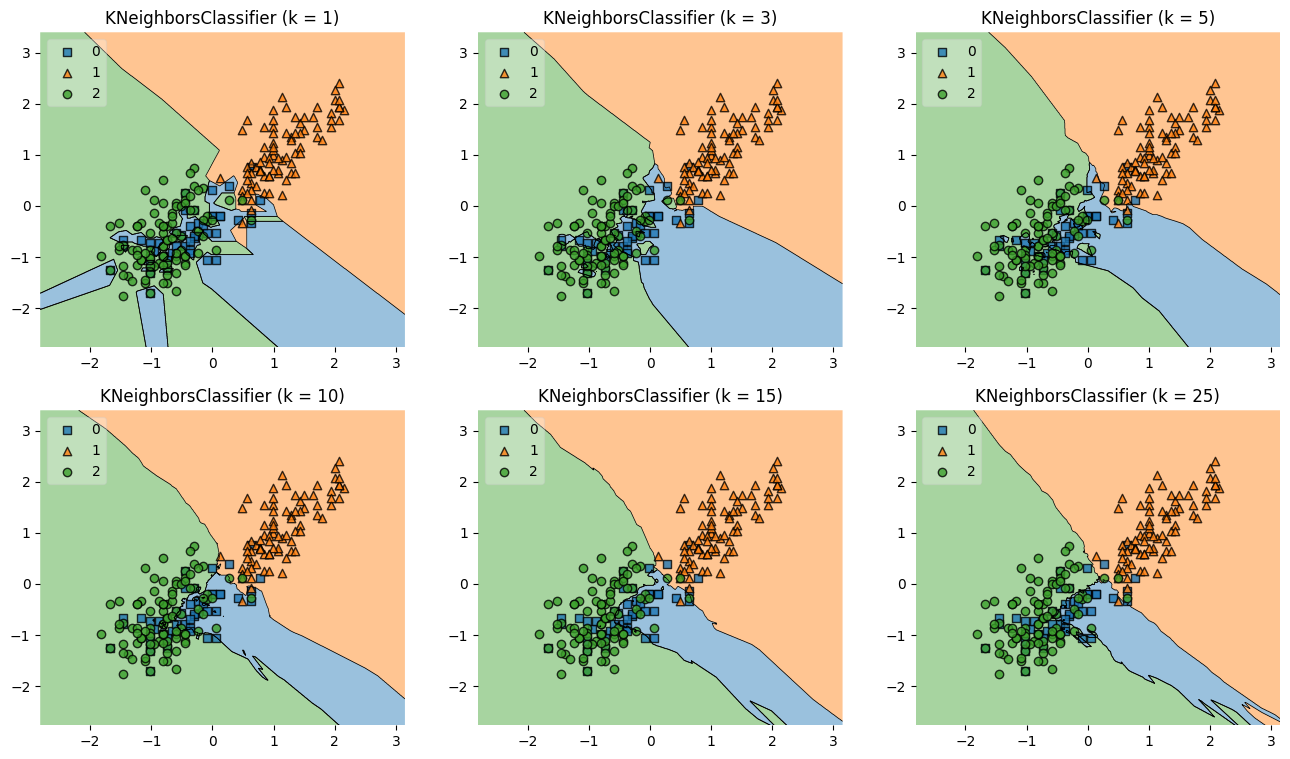

In [119]:
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(16, 9))

for model, k, grd in zip([KNeighborsClassifier(n_neighbors = k).fit(X_train_scaled, y_train) for k in [1, 3, 5, 10, 15, 25]], [1, 3, 5, 10, 15, 25], itertools.product([0, 1],[0, 1, 2], repeat=1)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train_scaled, y = np.array(y_train), clf = model, legend = 2)
    plt.title(f"KNeighborsClassifier (k = {k})")
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

**Вообще лучший результат у меня достигается при k = 10, в моём случае довольно явно (лучшая точность на тесте, при этом 0.8 на обучающей), так явное переобучение на k = 1 ("островки" на карте, при этом очень высокий показатель точности на обучающей выборке и средний на тестовой), на остальных уже более-менее, хотя начиная с k = 15 синяя зона уменьшается, что не очень хорошо)**

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

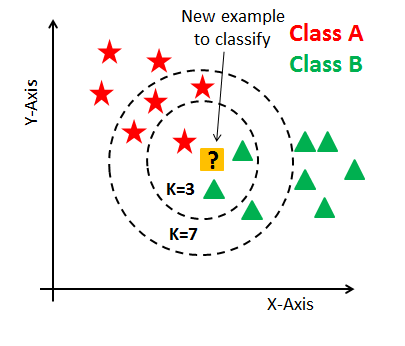

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [159]:
class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)

    def predict(self, X):
        X = np.array(X)
        distances = np.linalg.norm(self.X[None, :] - X[:, None], axis = 2)
        idx = np.argsort(distances, axis = 1)[:, :self.k]
        k_labels = self.y[idx]
        predicts = np.array([Counter(row).most_common(1)[0][0] for row in k_labels])
        return predicts

    def count_distance(self, x, y): # Достаточно только двух методов
        pass

In [160]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [161]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [189]:
knn = KNN(k = 11)
knn.fit(X_train_scaled, y_train)

print(f"Лучшее k: 11 с точностью {accuracy_score(y_test, knn.predict(X_test_scaled)):.2f} на test.")

Лучшее k: 11 с точностью 0.86 на test.


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [56]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [57]:
data = data.drop(columns = ["Unnamed: 0"])
print(data.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


**Первый столбец (типа индекса) удалили за ненадобностью, пропущенных значений, как видно - нет**

**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [58]:
data.corr(numeric_only = True).price

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

**Как видно - наибольшая корреляция у цены с carat, x, y и z**


**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [59]:
data = pd.get_dummies(data, columns = ["clarity", "cut", "color"], prefix_sep = ' ', dtype = int)

In [60]:
data

,carat,depth,table,price,x,y,z,clarity I1,clarity IF,clarity SI1,...,cut Ideal,cut Premium,cut Very Good,color D,color E,color F,color G,color H,color I,color J
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,1,0,0,1,0,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,...,0,0,0,1,0,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,...,0,0,1,1,0,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,1,0,0,0,0,0,1,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = ["price"]), data["price"], test_size = 0.3, random_state = 52)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [62]:
scaler = StandardScaler()

X_train[["carat", "depth","table", "x", "y", "z"]] = scaler.fit_transform(X_train[["carat", "depth","table", "x", "y", "z"]])
X_test[["carat", "depth","table", "x", "y", "z"]] = scaler.transform(X_test[["carat", "depth","table", "x", "y", "z"]])

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [63]:
linear_regression = LinearRegression().fit(X_train, y_train)

print(f"Train = {mean_squared_error(y_train, linear_regression.predict(X_train))}")
print(f"Test = {mean_squared_error(y_test, linear_regression.predict(X_test))}")

Train = 1283859.068354082
Test = 1261612.9574434075


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [64]:
for i in range(6):
    print(linear_regression.coef_[i], X_train.columns[i], sep = "\t")

5279.547975214068	carat
-96.2756061540174	depth
-65.80878560931673	table
-1075.771485646154	x
0.7983394470624573	y
-28.767314375341783	z


**Коэффициенты carat и x отличаются от остальных на порядки**

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [65]:
print("Lasso:")
lasso_regression = Lasso(alpha = 10)
lasso_regression.fit(X_train, y_train)
for i in range(6):
    print(lasso_regression.coef_[i], X_train.columns[i], sep = "\t")

Lasso:
4799.898737385869	carat
-106.30291976184775	depth
-85.51979472267894	table
-665.3546340886348	x
-0.0	y
-32.415697207610904	z


In [66]:
print("Ridge:")
ridge_regression = Ridge(alpha = 10)
ridge_regression.fit(X_train ,y_train)
for i in range(6):
    print(ridge_regression.coef_[i], X_train.columns[i],sep = "\t")

Ridge:
5240.47872562037	carat
-94.79905058334447	depth
-66.19821818746726	table
-1034.8295494457652	x
-1.076508443998902	y
-32.489166498483975	z


**Тут мы можем заметить, что Lasso уменьшил веса сильнее, в то время как Ridge вообще ничего токлом не изменил. Это всё сведетельствует о том, что в датасете присутствует значительная мультиколлинеарность**

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.410e+07, tolerance: 5.990e+07
  model = cd_fast.enet_coordinate_descent(


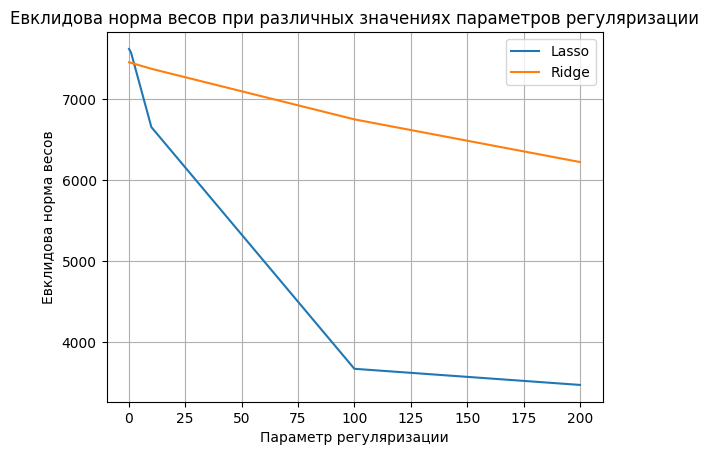

In [67]:
lasso = list()
ridge = list()
for i in [0.1, 1, 10, 100, 200]:
    lasso_regression = Lasso(alpha = i)
    lasso_regression.fit(X_train, y_train)
    ridge_regression = Ridge(alpha = i)
    ridge_regression.fit(X_train ,y_train)
    lasso.append(np.linalg.norm(lasso_regression.coef_))
    ridge.append(np.linalg.norm(ridge_regression.coef_))

_, ax = plt.subplots()
ax.plot([0.1, 1, 10, 100, 200], lasso)
ax.plot([0.1, 1, 10, 100, 200], ridge)
ax.set(xlabel = "Параметр регуляризации", ylabel = "Евклидова норма весов", title = "Евклидова норма весов при различных значениях параметров регуляризации")
plt.legend(['Lasso', 'Ridge'])
ax.grid()
plt.show()

**Как мы можем заметить, Lasso сильнее занижает норму весов, что в итоге нам даст лучшее понимание важности каждого коэффициента в итоговой версии модели**

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [72]:
lasso_cross_valid = LassoCV(alphas = [0.1, 1, 10, 100, 200], cv = 5)
lasso_cross_valid.fit(X_train, y_train)

for mse, alpha in zip(np.mean(lasso_cross_valid.mse_path_, axis = 1), lasso_cross_valid.alphas_):
    print(f"{mse}\t{alpha}")

2446894.631389916	200.0
2240122.334762865	100.0
1324938.5113786254	10.0
1288646.7609670341	1.0
1288422.3527071893	0.1


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.410e+07, tolerance: 5.990e+07
  model = cd_fast.enet_coordinate_descent(


**Как можем заметить, наименьшая ошибка достигается при $\alpha$ = 0.1**

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [73]:
print("Lasso:")
lasso_regression = Lasso(alpha = 0.1)
lasso_regression.fit(X_train, y_train)
for coef, col in zip(lasso_regression.coef_, X_train.columns):
    print(f"{coef}\t{col}")

Lasso:
5274.807570374468	carat
-96.39645175433876	depth
-66.00446649717402	table
-1071.011006871702	x
-0.0	y
-28.716040679059716	z
-4390.673604171426	clarity I1
947.4030050343969	clarity IF
-699.8763740295055	clarity SI1
-1661.7015672944226	clarity SI2
226.07386938173698	clarity VS1
-93.04855648450197	clarity VS2
628.3257942742697	clarity VVS1
607.9916927399908	clarity VVS2
-756.1921420766057	cut Fair
-129.797869927301	cut Good
103.59676740731221	cut Ideal
37.46867922209203	cut Premium
0.0	cut Very Good
725.6687733282573	color D
523.1552399582456	color E
453.22322649528655	color F
246.87419909305623	color G
-234.0522838043005	color H
-718.2136210693677	color I
-1615.3086981089255	color J


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.410e+07, tolerance: 5.990e+07
  model = cd_fast.enet_coordinate_descent(


**В моём случае получилось так, что неиформативными оказались y и cut Very Good. Вообще не очень понятно, почему так получилось с cut Very Good (скорее-всего просто категориальные данные не очень выделены и показательны), а вот с y всё достаточно просто - так как данные о размерах не так важны при том, что у нас есть параметр carat (который и так многое говорит о размере)**

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [74]:
print("Linear:", mean_squared_error(y_test, linear_regression.predict(X_test)))
print("Lasso:", mean_squared_error(y_test, lasso_regression.predict(X_test)))

Linear: 1261612.9574434075
Lasso: 1261704.230909038


**По итогу мы имеем, что Lasso получилось даже чуточку хуже (очень незначительно), чем обычная линейная регрессия. Но скорее-всего такой результат получился из-за того, что в датасете очень много мультиколлинеарных параметров**